In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/abalone_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/abalone_dataset.csv'

In [ ]:
df.head()

In [ ]:
#rename output variable
df.rename(columns={"Sex":"sex", "Length":"length", "Diameter":"diameter",
                   "Height":"height", "Whole weight":"whole_weight",
                   "Shucked weight":"shucked_weight", "Viscera weight":"viscera_weight",
                   "Shell weight":"shell_weight", "Rings":"rings"}, inplace = True)

In [ ]:
df.head()

In [ ]:
df.shape

In [7]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df[df['height'] == 0]
df.drop(index=[1257,3996], inplace = True)

In [9]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df['age'] = df['rings']+1.5 #AS per the problem statement
df.drop('rings', axis = 1, inplace = True)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Feature Engineering

In [1]:
#Age vs sex
#categorical features
temp = pd.concat([df['age'], df['sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='sex', y="age", data=df)
fig.axis(ymin=0, ymax=30);

NameError: name 'pd' is not defined

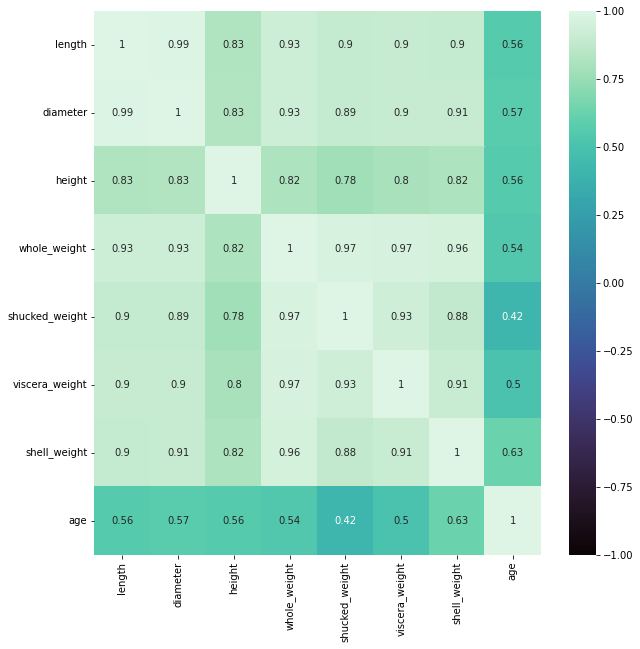

In [12]:

corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

In [13]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['diameter', 'shucked_weight', 'viscera_weight', 'shell_weight']


In [14]:
df.drop(columns_to_drop, axis=1, inplace = True)

In [15]:
df.head()

,sex,length,height,whole_weight,age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


In [16]:
#calculating VIF
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [17]:
temp = df.drop('sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)


,Features,VIF
3,whole_weight,7.425114
1,length,7.833655
2,height,3.532659
0,const,62.359271
4,age,1.515261


Text(0.5, 1.0, 'height vs sex')

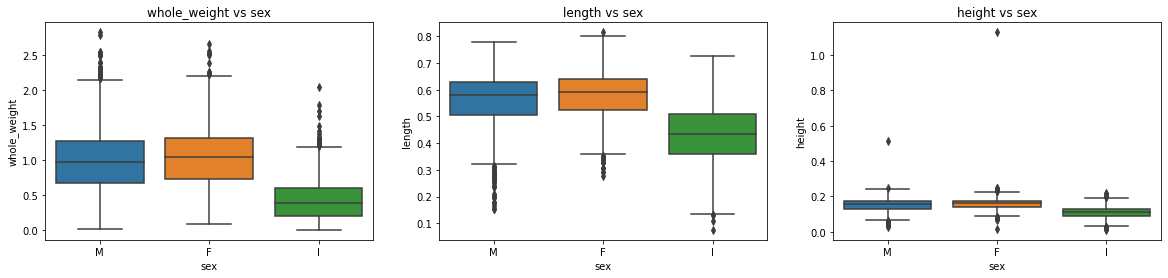

In [18]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'sex', y = 'whole_weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'sex', y = 'length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'sex', y = 'height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

In [19]:
df['height'] = np.sqrt(df['height'])

In [20]:
df.skew().sort_values(ascending = False)

age             1.113754
whole_weight    0.530549
height         -0.176012
length         -0.640993
dtype: float64

Text(0.5, 1.0, 'height vs sex')

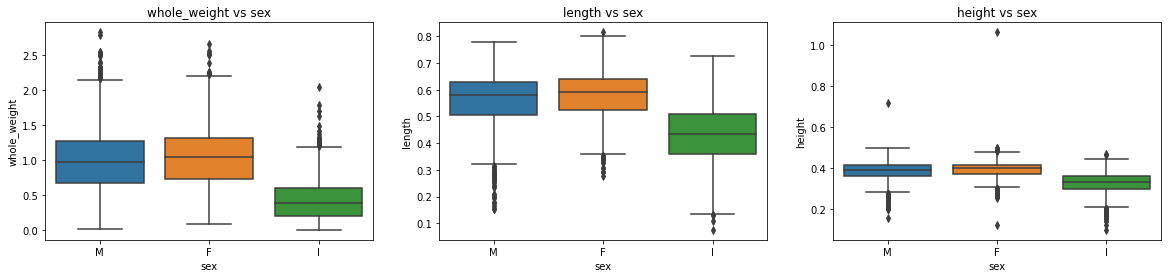

In [21]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'sex', y = 'whole_weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'sex', y = 'length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'sex', y = 'height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

All independent varibles values are close to zero. So, they are now close to gaussian distribution.

- Histograms: Distribution of the Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e3ab87460>,
      dtype=object)

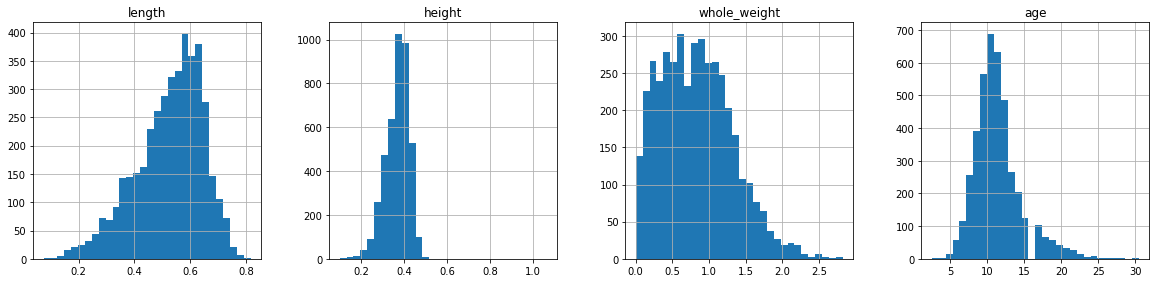

In [22]:
df.hist(figsize = (20,10), layout = (2,4), bins = 30)

In [23]:
Age = []
for i in df["whole_weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df["age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,sex,length,height,whole_weight,age
0,M,0.455,0.308221,0.5140,1
1,M,0.350,0.300000,0.2255,1
2,F,0.530,0.367423,0.6770,2
3,M,0.440,0.353553,0.5160,1
4,I,0.330,0.282843,0.2050,1


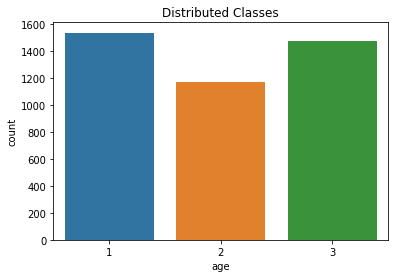

In [24]:
sns.countplot('age', data=df)
plt.title('Distributed Classes')
plt.show()

In [25]:
new_df = pd.get_dummies(df, columns = ['sex'], prefix_sep='_', drop_first = True)
new_df['age'].value_counts()

1    1534
3    1473
2    1168
Name: age, dtype: int64

In [26]:
#NEW VIF
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,whole_weight,9.799019
6,sex_M,1.384868
5,sex_I,1.983488
1,length,9.680103
2,height,4.979747
0,const,128.016288
4,age,5.326806


In [27]:
new_df['length'] = np.sqrt(new_df['length'])
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,whole_weight,8.556129
6,sex_M,1.384512
5,sex_I,1.984036
1,length,7.495609
2,height,5.302027
0,const,249.609951
4,age,5.264169


## Model Training

In [5]:
X = new_df.drop('age', axis = 1)
y = new_df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use if you want to normalize data
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)
#X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
#X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

#X_train = X_train_std.values
#X_test = X_test_std.values

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

NameError: name 'new_df' is not defined

In [37]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(),
               "RandomForestClassifier" : RandomForestClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.0 % accuracy score
Classifiers:  SVC Has a training score of 99.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


In [38]:
y_train

array([1, 3, 2, ..., 2, 2, 3])

In [39]:
print(X_train)
print(X_train[0])

[[0.68920244 0.34641016 0.441      1.         0.        ]
 [0.83666003 0.41833001 1.8565     0.         1.        ]
 [0.70710678 0.36055513 0.7715     0.         1.        ]
 ...
 [0.72111026 0.38729833 0.728      0.         0.        ]
 [0.75828754 0.38729833 0.927      0.         0.        ]
 [0.77136243 0.4        1.1405     0.         0.        ]]
[0.68920244 0.34641016 0.441      1.         0.        ]


In [43]:
y_train.shape

(3340,)

In [44]:
y_test.shape

(835,)

In [45]:
X_train.shape

(3340, 5)

In [46]:
X_test.shape

(835, 5)

In [4]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NameError: name 'X_train' is not defined

In [41]:
new_df.head()

,length,height,whole_weight,age,sex_I,sex_M
0,0.674537,0.308221,0.5140,1,0,1
1,0.591608,0.300000,0.2255,1,0,1
2,0.728011,0.367423,0.6770,2,0,0
3,0.663325,0.353553,0.5160,1,0,1
4,0.574456,0.282843,0.2050,1,1,0


In [3]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [32]:
import pickle
pickle.dump(model, open('randomForest.pkl', 'wb'))

NameError: name 'model' is not defined

In [39]:

from matplotlib import pyplot as plt
new_df = pd.get_dummies(df, columns = ['sex'], prefix_sep='_', drop_first = True)
X = new_df.drop('age', axis = 1)
y = new_df['age']
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use if you want to normalize data
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)
#X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
#X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

#X_train = X_train_std.values
#X_test = X_test_std.values

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values
history = model.fit(X_train, y_train)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

ValueError: Unknown label type: 'continuous'

In [28]:
pip install keras


     ---------------------------------------- 1.7/1.7 MB 3.1 MB/s eta 0:00:00
